In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)

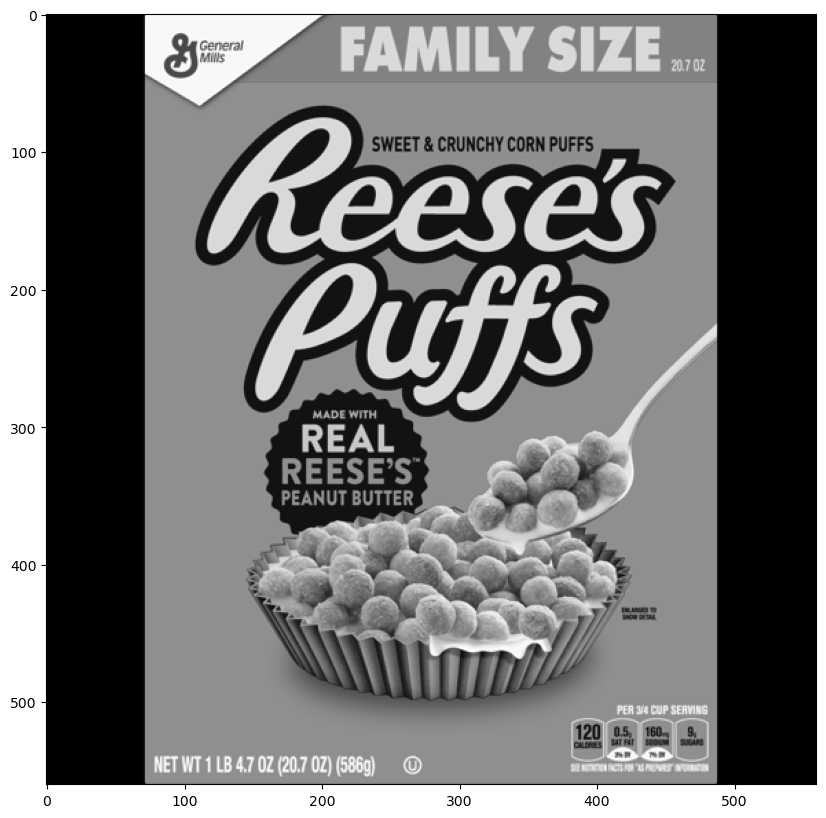

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('DATA/many_cereals.jpg',0)

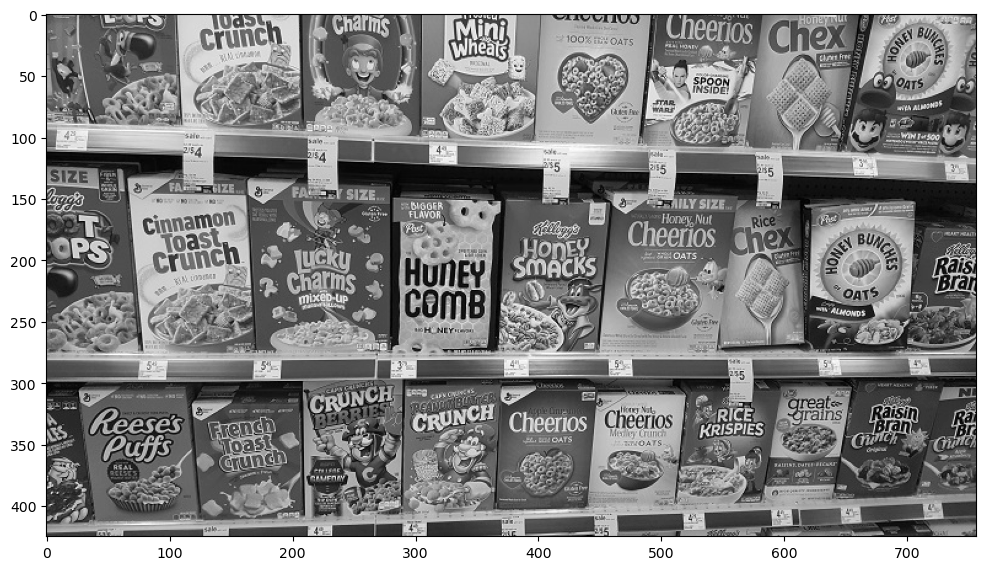

In [7]:
display(cereals)

In [8]:
# BRUTFORCE METHOD 

In [9]:
orb = cv2.ORB_create()

In [10]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [12]:
matches = bf.match(des1,des2)

In [13]:
matches = sorted(matches,key=lambda x:x.distance)

In [14]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2,matches[:25],None,flags = 2)

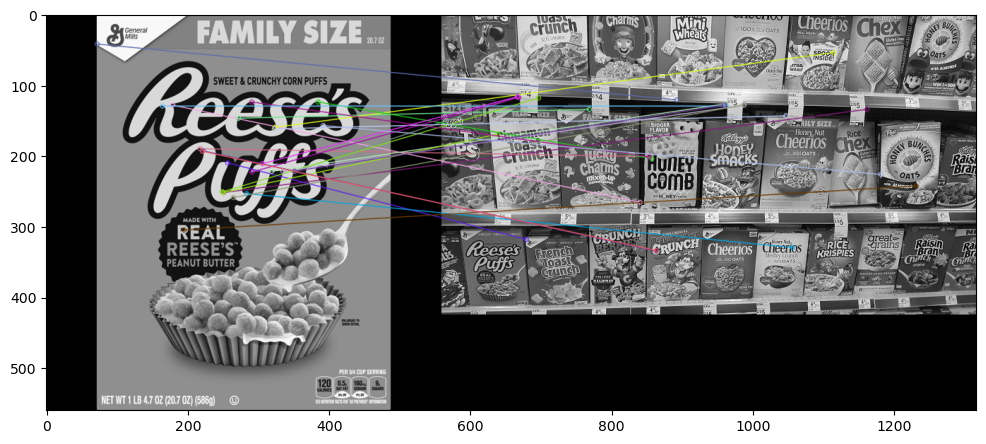

In [15]:
display(reeses_matches)

In [16]:
#SIFT discriptors

In [17]:
sift = cv2.xfeatures2d.SIFT_create()

[ WARN:0@603.647] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [18]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [19]:
bf = cv2.BFMatcher()

In [20]:
matches = bf.knnMatch(des1,des2,k=2)

In [21]:
good = []

# LESS DISTANCE MEANS BETTER MATCH
# RATIO MATCH < 75% MATCH 2
for match1,match2 in matches:
    # IF MATCH 1 DISTANACE IS LESS THAT 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTION WAS A GOOD MATCH, LETS KEEP IT
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [22]:
len(good)

78

In [26]:
len(matches)

1500

In [28]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)

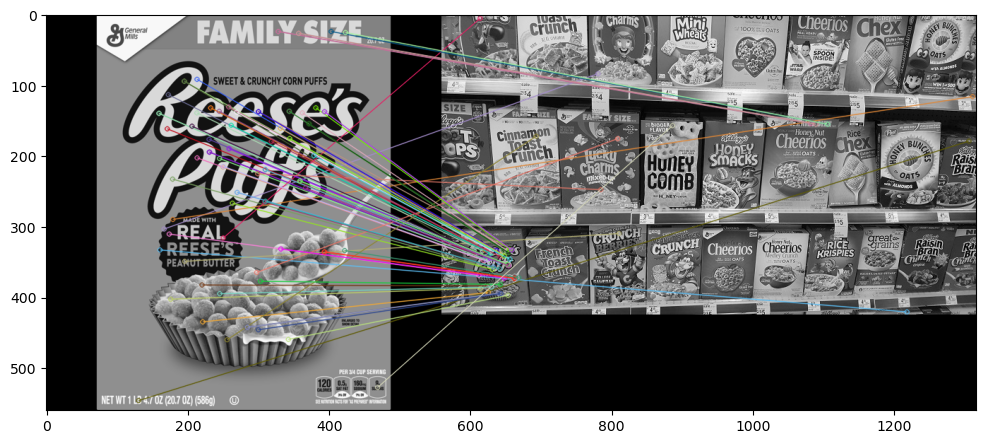

In [29]:
display(sift_matches)

In [54]:
#FLANN based matchers

In [55]:
sift = cv2.xfeatures2d.SIFT_create()

In [56]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [57]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [58]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [59]:
matches = flann.knnMatch(des1,des2,k=2)

In [60]:
matchesMask = [[0,0] for i in range(len(matches))]

In [63]:
good = []

# LESS DISTANCE MEANS BETTER MATCH
# RATIO MATCH < 75% MATCH 2
for i,(match1,match2) in enumerate(matches):
    # IF MATCH 1 DISTANACE IS LESS THAT 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTION WAS A GOOD MATCH, LETS KEEP IT
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]

In [66]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags=0)

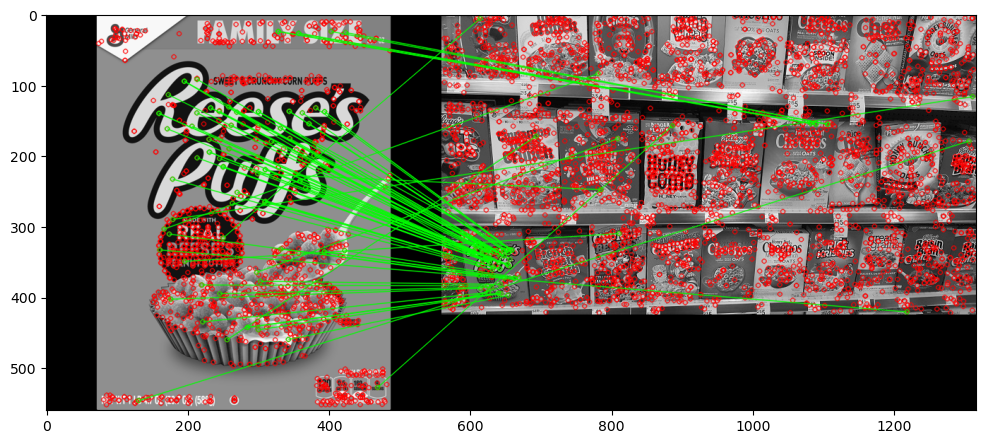

In [68]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)

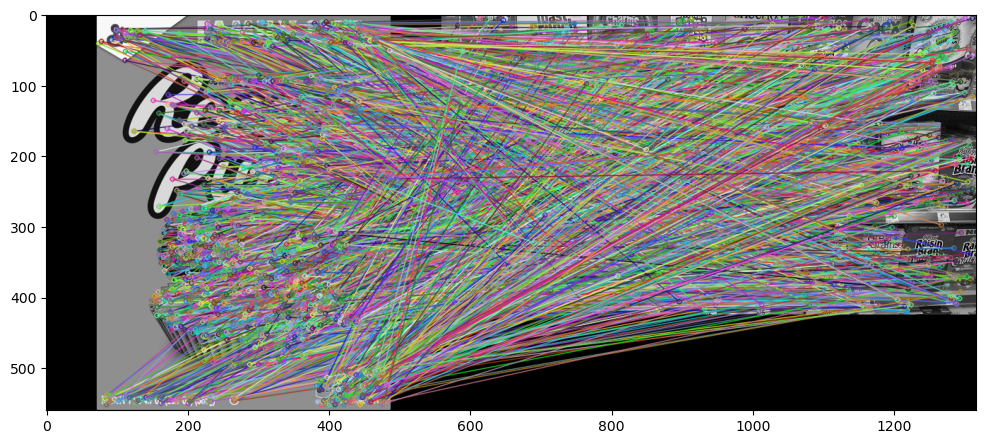

In [72]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, flags=2)
display(flann_matches)